## Building Autoencoders

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3519 - val_loss: 0.1735
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1653 - val_loss: 0.1410
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1372 - val_loss: 0.1253
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1245 - val_loss: 0.1177
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1179 - val_loss: 0.1134
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1143 - val_loss: 0.1106
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1115 - val_loss: 0.1078
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1088 - val_loss: 0.1059
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1064 - val_loss: 0.1038
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1047 - val_loss: 0.1022
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


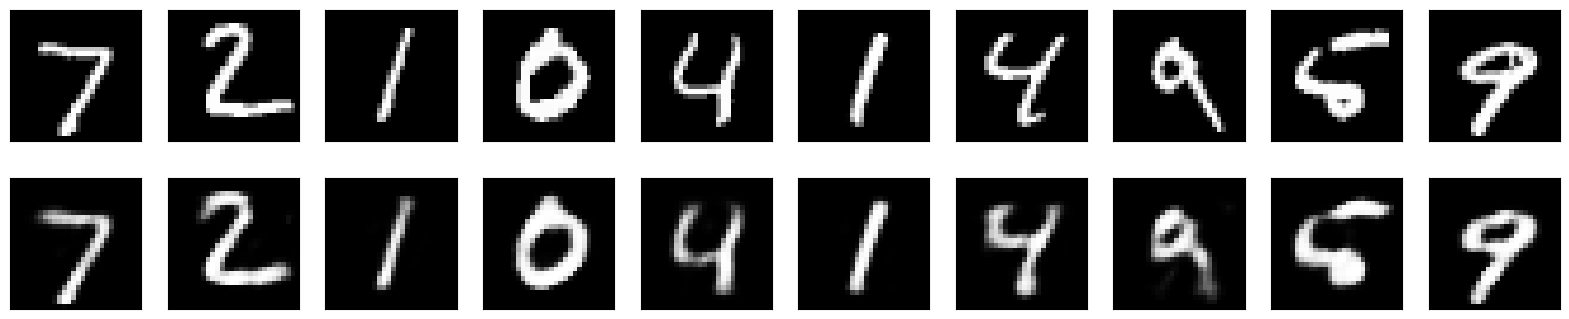

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

### Fine-Tuning the Autoencoder

In [5]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0935 - val_loss: 0.0908
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0913 - val_loss: 0.0905
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0915 - val_loss: 0.0902
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0911 - val_loss: 0.0902
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0908 - val_loss: 0.0899
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0906 - val_loss: 0.0896
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0904 - val_loss: 0.0893
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - val_loss: 0.0894
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0902 - val_loss: 0.0892
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0901 - val_loss: 0.0890


### Denoising Images with Autoencoder

- comparing the noisy, denoised, and original images.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2095 - val_loss: 0.1431
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1411 - val_loss: 0.1334
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1330 - val_loss: 0.1289
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1291 - val_loss: 0.1267
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1269 - val_loss: 0.1252
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1259 - val_loss: 0.1242
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1247 - val_loss: 0.1236
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1239 - val_loss: 0.1235
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1235 - val_loss: 0.1228
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1230 - val_loss: 0.1223
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1228 - val_loss: 0.1220
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12m

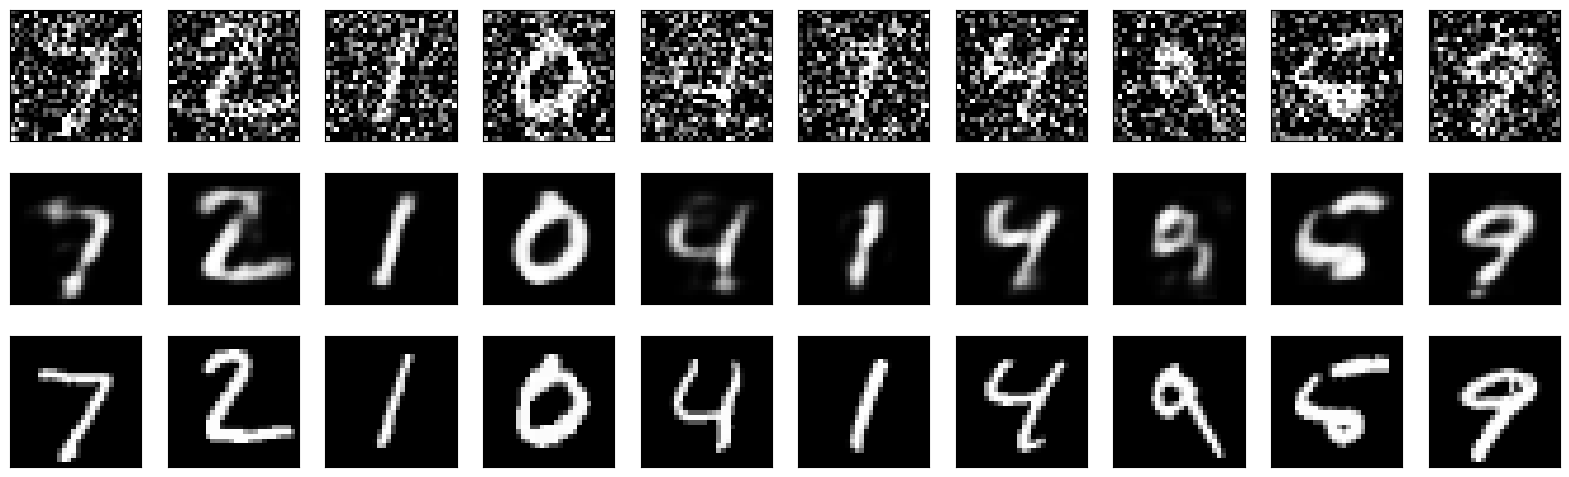

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### Exploring Different Bottleneck Sizes

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 

In [7]:
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3516 - val_loss: 0.1785
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1702 - val_loss: 0.1477
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1448 - val_loss: 0.1346
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1344 - val_loss: 0.1293
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1295 - val_loss: 0.1262
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1274 - val_loss: 0.1244
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1259 - val_loss: 0.1234
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1246 - val_loss: 0.1227
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1241 - val_loss: 0.1217
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1234 - val_loss: 0.1211
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1226 - val_loss: 0.1200
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

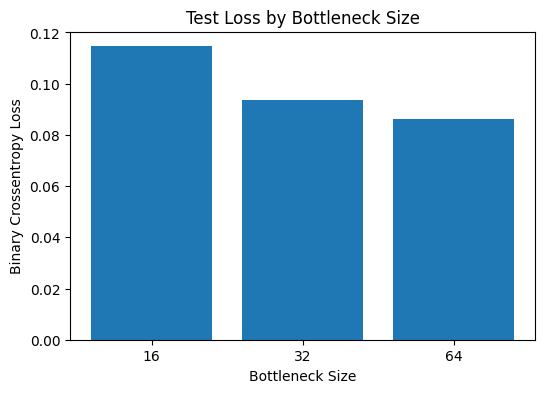

In [8]:
losses = [autoencoder.evaluate(x_test, x_test, verbose=0) for autoencoder in autoencoders]

plt.figure(figsize=(6, 4))
plt.bar([str(size) for size in bottleneck_sizes], losses)
plt.title("Test Loss by Bottleneck Size")
plt.xlabel("Bottleneck Size")
plt.ylabel("Binary Crossentropy Loss")
plt.show()


### Adding Regularization to the Autoencoder

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 

In [9]:
from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.7526 - val_loss: 0.4421
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4244 - val_loss: 0.3969
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3936 - val_loss: 0.3815
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3784 - val_loss: 0.3674
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3647 - val_loss: 0.3546
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3522 - val_loss: 0.3446
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3425 - val_loss: 0.3363
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3346 - val_loss: 0.3293
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3274 - val_loss: 0.3228
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3217 - val_loss: 0.3170
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3157 - val_loss: 0.3114
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/st

### Visualizing Intermediate Representations

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step


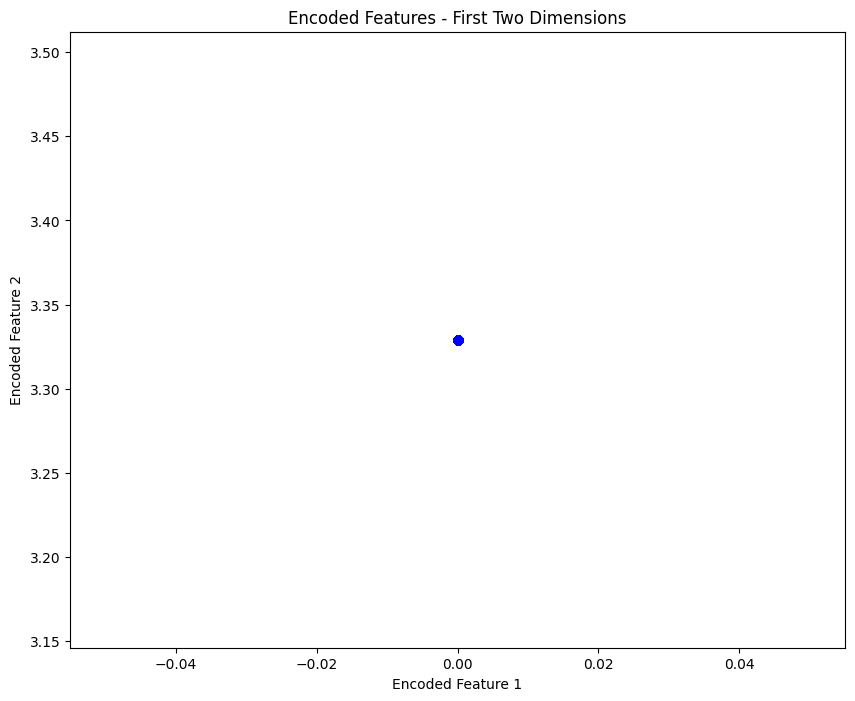

In [10]:
import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()

In [ ]:
print(np.var(x_test, axis=0).mean())  
print(encoded_imgs[:5]) 


0.067408204
[[0.        3.3291166 4.19811   0.        3.4305744 3.210703  1.6114973
  0.        0.        2.1708784 0.        2.1219187 0.        4.2133203
  3.5913067 2.5049155 2.5143747 3.8807795 1.6600608 0.        0.
  4.3519473 3.877584  0.        1.9978534 2.5437882 0.        1.6028146
  3.42269   2.904806  2.8993683 1.8459077]
 [0.        3.3291166 4.19811   0.        3.4305744 3.2107031 1.6114973
  0.        0.        2.1708784 0.        2.1219187 0.        4.2133203
  3.5913067 2.5049155 2.5143747 3.8807795 1.6600608 0.        0.
  4.3519473 3.877584  0.        1.9978534 2.5437882 0.        1.6028146
  3.42269   2.904806  2.8993683 1.8459077]
 [0.        3.3291166 4.19811   0.        3.4305744 3.210703  1.6114973
  0.        0.        2.1708784 0.        2.1219187 0.        4.2133203
  3.5913067 2.5049155 2.5143747 3.8807795 1.6600608 0.        0.
  4.3519473 3.877584  0.        1.9978534 2.5437882 0.        1.6028146
  3.42269   2.904806  2.8993683 1.8459077]
 [0.        3.32

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4004 - val_loss: 0.2628
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2614 - val_loss: 0.2559
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2547 - val_loss: 0.2507
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2496 - val_loss: 0.2456
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2445 - val_loss: 0.2409
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2354 - val_loss: 0.2240
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2232 - val_loss: 0.2187
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2176 - val_loss: 0.2138
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2130 - val_loss: 0.2103
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2095 - val_loss: 0.2083
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2077 - val_loss: 0.2066
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

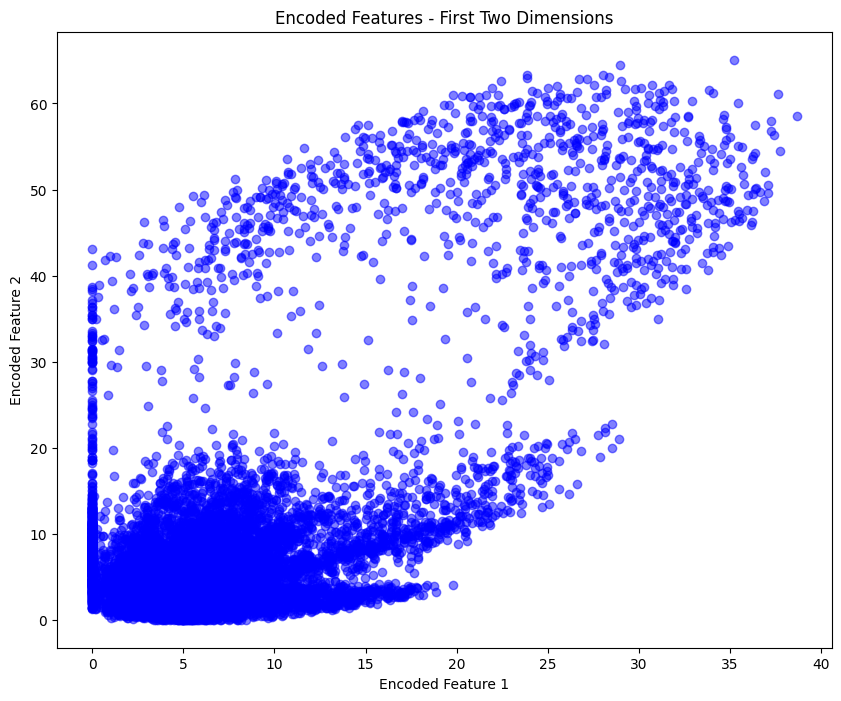

In [13]:
# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(2, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

loss = autoencoder.evaluate(x_test, x_test) 

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4938 - val_loss: 0.2685
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2669 - val_loss: 0.2639
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2637 - val_loss: 0.2631
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2631 - val_loss: 0.2629
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2628 - val_loss: 0.2627
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2629 - val_loss: 0.2627
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2631 - val_loss: 0.2626
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2627 - val_loss: 0.2628
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2632 - val_loss: 0.2626
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2624 - val_loss: 0.2626
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms

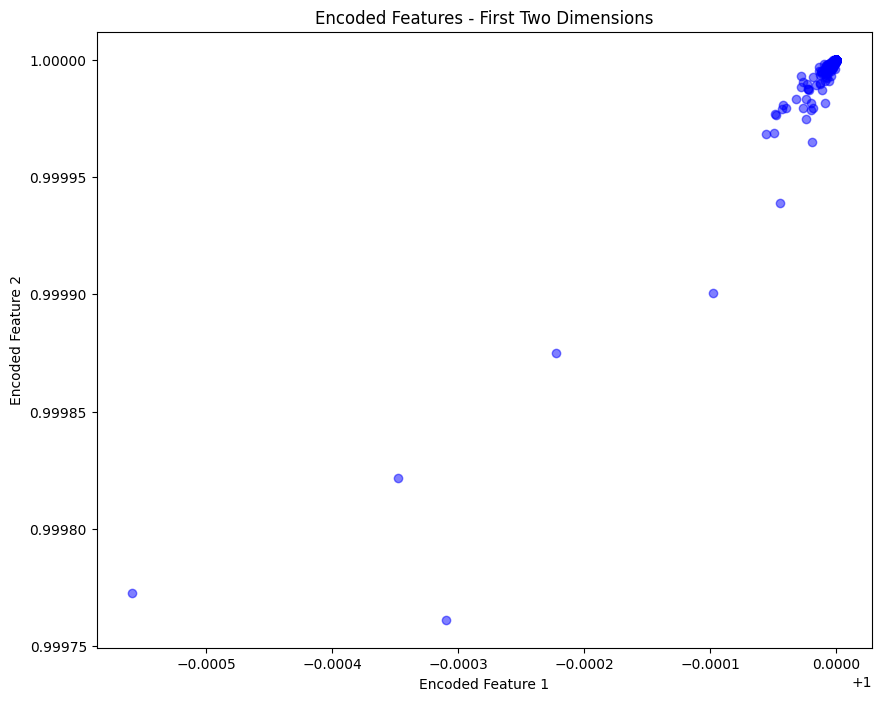

In [ ]:
# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(2, activation='tanh')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

loss = autoencoder.evaluate(x_test, x_test) 

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()